In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense

## 1. 讀取mnist資料

In [3]:
(tr_img, tr_lab), (ts_img, ts_lab) = mnist.load_data()

In [4]:
tr_img = tr_img.reshape(tr_img.shape[0], -1).astype('float32') / 255
ts_img = ts_img.reshape(ts_img.shape[0], -1).astype('float32') / 255

## 2. 建立model

In [5]:
class Autoencoder(tf.keras.Model):
    
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.FC1 = Dense(128)
        self.FC2 = Dense(64)
        self.FC3 = Dense(32)
        self.FC4 = Dense(2)
        
        # Decoder
        self.FC5 = Dense(32)
        self.FC6 = Dense(64)
        self.FC7 = Dense(784)
        
        
    def encoder(self, inputs):
        x_e = tf.nn.relu(self.FC1(inputs))
        x_e = tf.nn.relu(self.FC2(x_e))
        x_e = tf.nn.relu(self.FC3(x_e))
        x_e = self.FC4(x_e)

        return x_e
    
    
    def decoder(self, inputs):
        x_d = tf.nn.relu(self.FC5(inputs))
        x_d = tf.nn.relu(self.FC6(x_d))
        x_d = tf.nn.sigmoid(self.FC7(x_d))
        
        return x_d
    
    
    def call(self, inputs, training=True):
        x_e = self.encoder(inputs)
        x_d = self.decoder(x_e)
        
        return x_d

In [6]:
model = Autoencoder()
model.build(input_shape=(4,784))
model.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  8256      
_________________________________________________________________
dense_2 (Dense)              multiple                  2080      
_________________________________________________________________
dense_3 (Dense)              multiple                  66        
_________________________________________________________________
dense_4 (Dense)              multiple                  96        
_________________________________________________________________
dense_5 (Dense)              multiple                  2112      
_________________________________________________________________
dense_6 (Dense)              multiple                  

## 3. Training

In [7]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss)

In [8]:
train_history = model.fit(tr_img, tr_img, epochs=20, batch_size=128, shuffle=True)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3219
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2192
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2076
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2004
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1958
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1930
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1907
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1891
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1870
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1860
Epoch 11/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1843
Epoch 12/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1838
Epoch 13/20
469/469 [====

## 4. 視覺化

### 4.1 Latent space

In [9]:
def PlotLatentSpace(model, n=30, figsize=15):
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))

    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            sample = np.array([[xi, yi]])
            x_d = model.decoder(sample)
            digit = tf.reshape(x_d, [digit_size, digit_size])*255
 
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.imshow(figure, cmap = "Greys_r")
    plt.show()

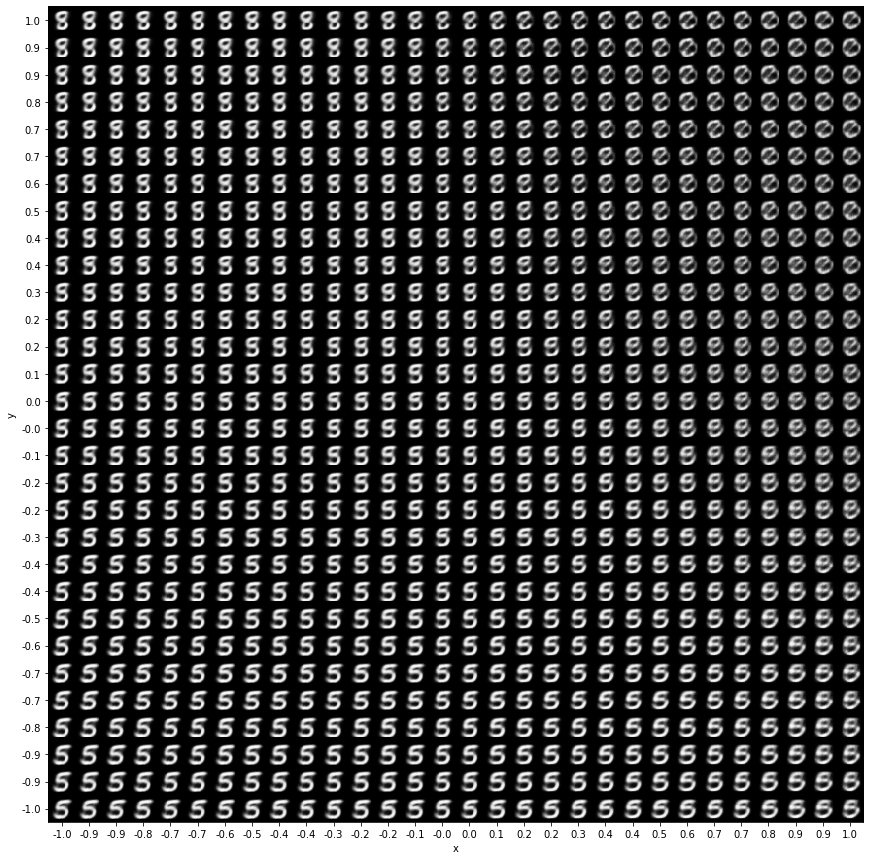

In [10]:
PlotLatentSpace(model)

### 4.2 Label clusters

In [11]:
def PlotLabelClusters(model, data, labels):
    data = data.reshape(-1,784)
    x_e = model.encoder(data)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x_e[:, 0], x_e[:, 1], c=labels)
    plt.colorbar()
    plt.title('Label Clusters')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

#### 4.2.1 training data

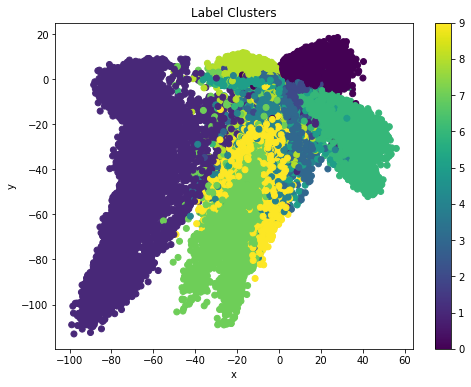

In [12]:
PlotLabelClusters(model, tr_img, tr_lab)

#### 4.2.2 testing data

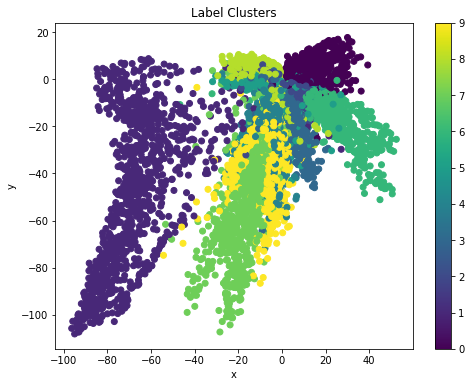

In [13]:
PlotLabelClusters(model, ts_img, ts_lab)